In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
customer=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer.shape

(200, 5)

In [6]:
customer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There are no missing values in this dataset.

In [7]:
#renaming the columns for better readability
customer.rename(columns={'Annual Income (k$)':'Annual_Income($)','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [8]:
customer

,CustomerID,Gender,Age,Annual_Income($),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
customer.describe()

,CustomerID,Age,Annual_Income($),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income($)', 'Spending_Score'], dtype='object')

**EXPLORATORY DATA ANALYSIS**

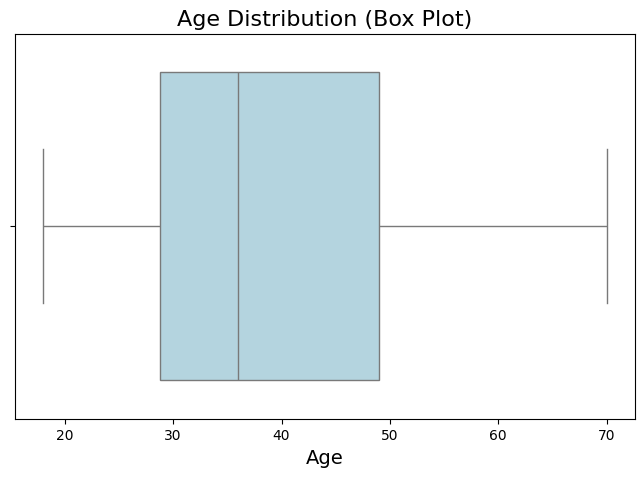

In [45]:
# univariate analysis
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.boxplot(x=customer['Age'], color='lightblue')
plt.title('Age Distribution (Box Plot)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.show()

<ipython-input-90-80a103291233>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=age_count, palette='coolwarm')


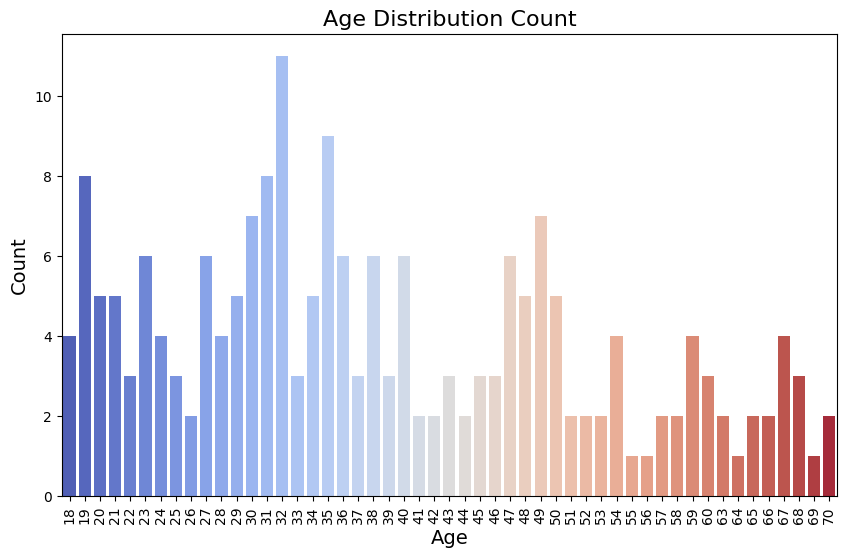

In [90]:
age_count = customer.groupby('Age')['Age'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Count', data=age_count, palette='coolwarm')
plt.title('Age Distribution Count', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()


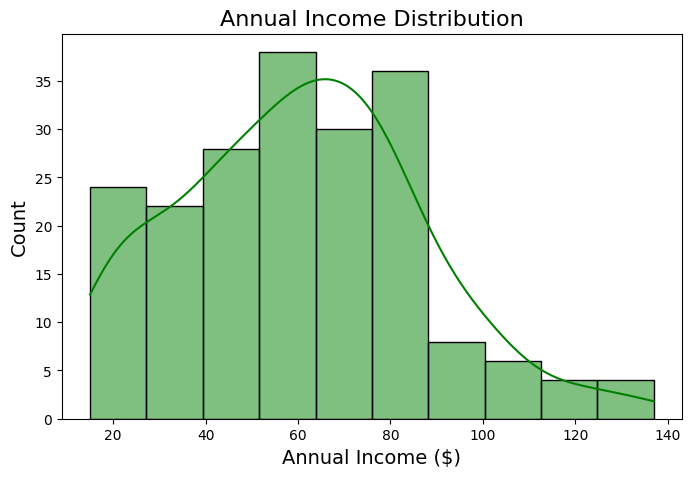

In [47]:
# Distribution of Income
plt.figure(figsize=(8, 5))
sns.histplot(customer['Annual_Income($)'], kde=True, color='green')
plt.title('Annual Income Distribution', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


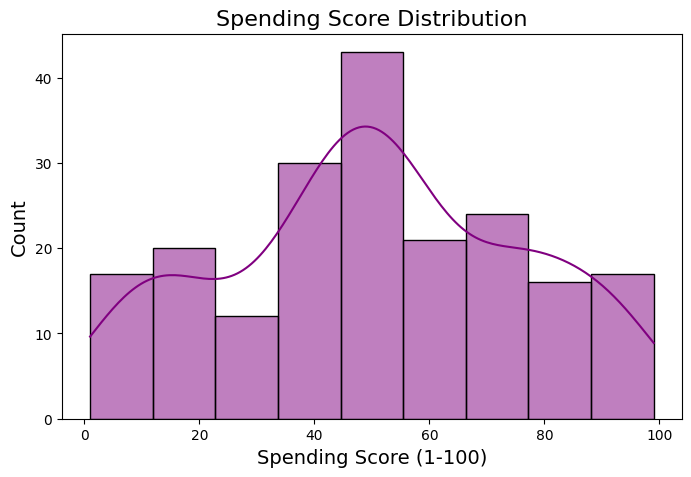

In [49]:
# Distribution of Spending score
plt.figure(figsize=(8, 5))
sns.histplot(customer['Spending_Score'], kde=True, color='purple')
plt.title('Spending Score Distribution', fontsize=16)
plt.xlabel('Spending Score (1-100)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [35]:
gender_dist=customer.groupby('Gender')['Gender'].count()
gender_dist

,Gender
Gender,
Female,112
Male,88


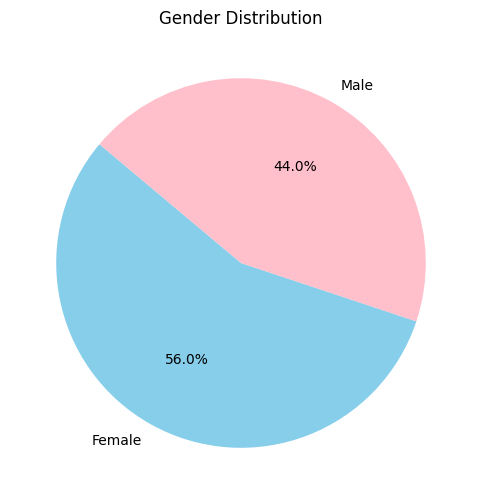

In [40]:
plt.figure(figsize=(6, 6))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.show()


**Gender V/S Spending Score**

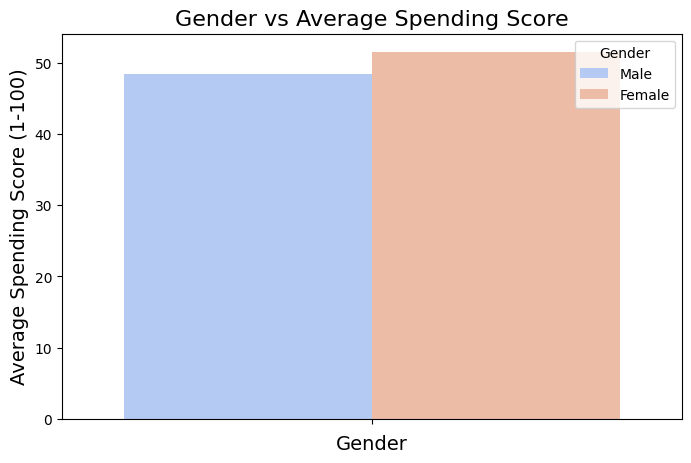

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(hue='Gender', y='Spending_Score', data=customer, errorbar=None, palette='coolwarm')
plt.title('Gender vs Average Spending Score', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Spending Score (1-100)', fontsize=14)
plt.show()

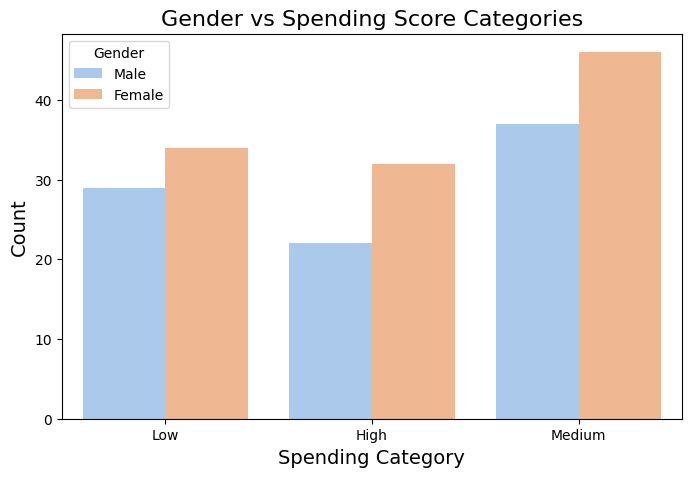

In [67]:
def categorize_spending(score):
    if score <= 40:
        return 'Low'
    elif score <= 70:
        return 'Medium'
    else:
        return 'High'

customer['Spending_Category'] = customer['Spending_Score'].apply(categorize_spending)

# Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Spending_Category', hue='Gender', data=customer, palette='pastel')
plt.title('Gender vs Spending Score Categories', fontsize=16)
plt.xlabel('Spending Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender')
plt.show()

**Age V/S Spending Score**

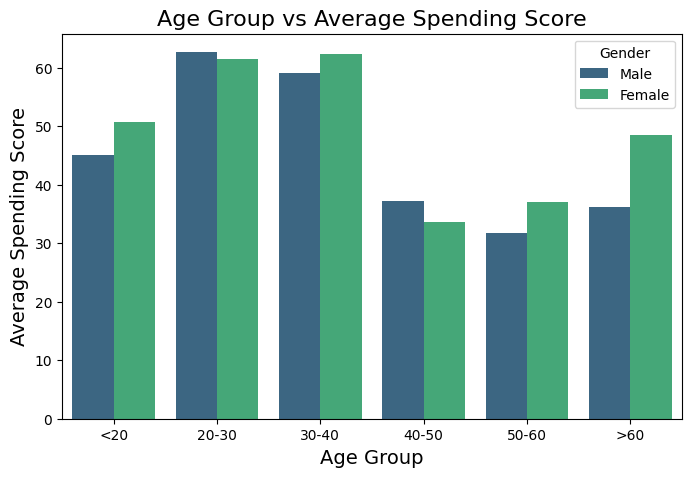

In [69]:
# Bar Plot for Age Groups vs Average Spending Score
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '>60']
customer['Age_Group'] = pd.cut(customer['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Spending_Score', hue='Gender', data=customer, errorbar=None, palette='viridis')
plt.title('Age Group vs Average Spending Score', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Spending Score', fontsize=14)
plt.legend(title='Gender')
plt.show()


**Annual Income vs Spending Score**

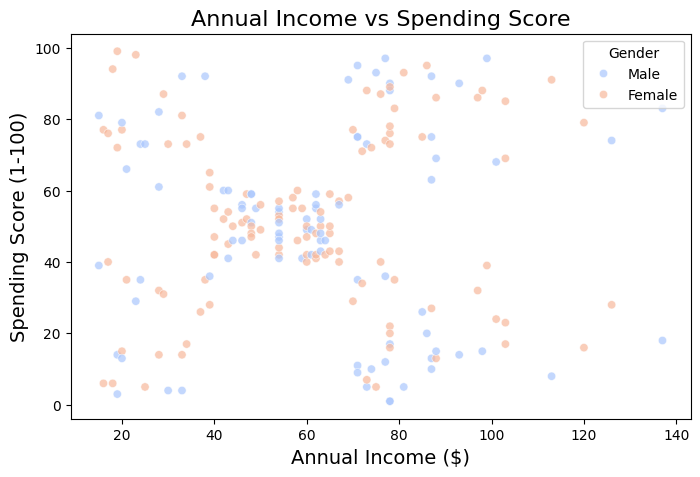

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual_Income($)', y='Spending_Score', data=customer, hue='Gender', palette='coolwarm', alpha=0.7)
plt.title('Annual Income vs Spending Score', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Gender')
plt.show()

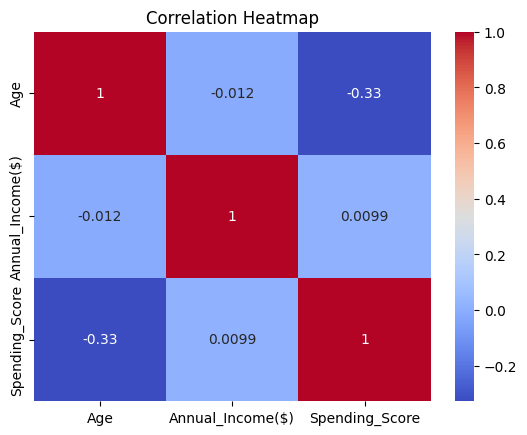

In [20]:
# Correlation heatmap
sns.heatmap(customer[['Age', 'Annual_Income($)', 'Spending_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [79]:
# Converting 'Gender' to numerical (e.g., Male: 0, Female: 1)
customer['Gender'] = customer['Gender'].map({'Male': 0, 'Female': 1})

In [80]:
# Selecting features for clustering
X = customer[['Age', 'Gender', 'Annual_Income($)', 'Spending_Score']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

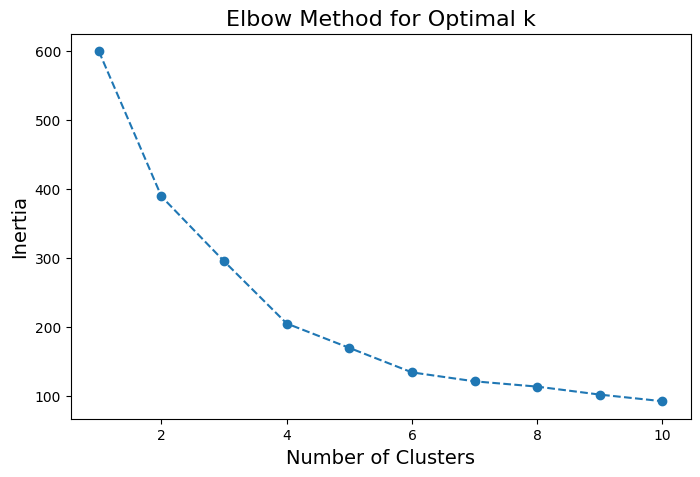

In [74]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()


In [81]:
from sklearn.cluster import KMeans

# Performing K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


In [82]:
customer['Cluster'] = y_kmeans

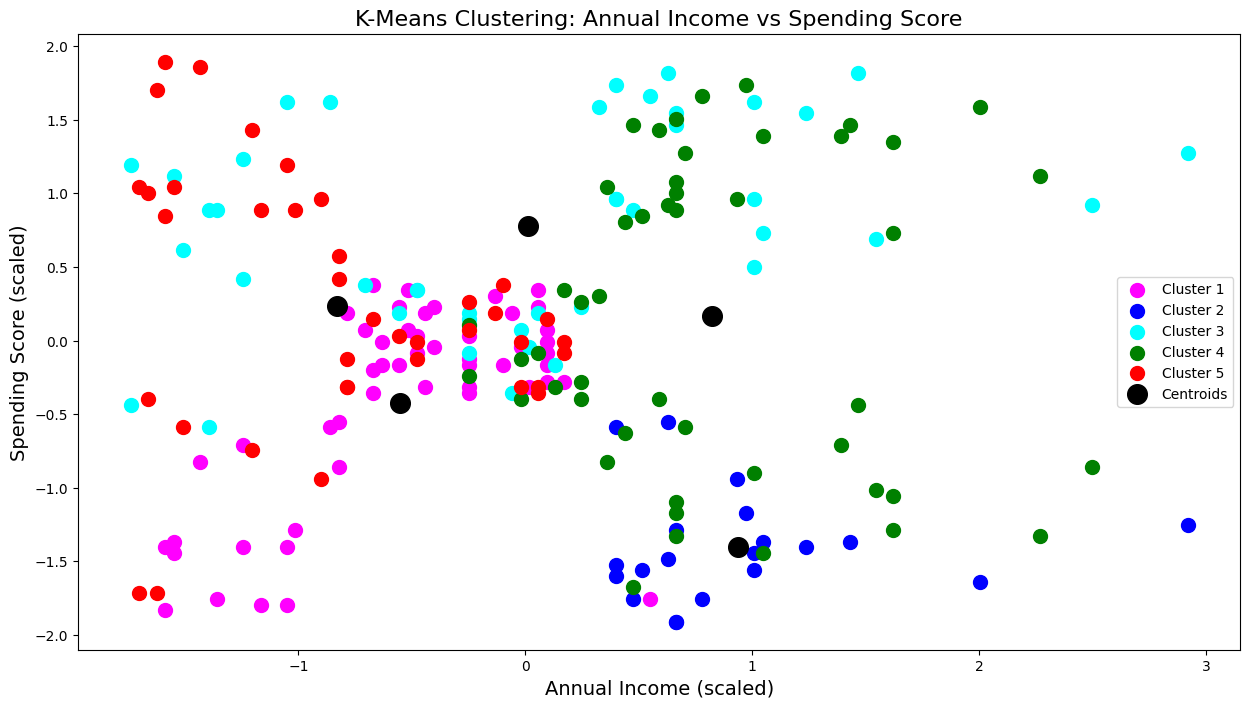

In [84]:
# Plotting the clusters based on Annual Income and Spending Score
plt.figure(1, figsize=(15, 8))
plt.scatter(X_scaled[y_kmeans == 0, 2], X_scaled[y_kmeans == 0, 3], s=100, c='magenta', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 2], X_scaled[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 2], X_scaled[y_kmeans == 2, 3], s=100, c='cyan', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 2], X_scaled[y_kmeans == 3, 3], s=100, c='green', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 2], X_scaled[y_kmeans == 4, 3], s=100, c='red', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='black', label='Centroids')

# Add titles and labels
plt.title('K-Means Clustering: Annual Income vs Spending Score', fontsize=16)
plt.xlabel('Annual Income (scaled)', fontsize=14)
plt.ylabel('Spending Score (scaled)', fontsize=14)
plt.legend()
plt.show()

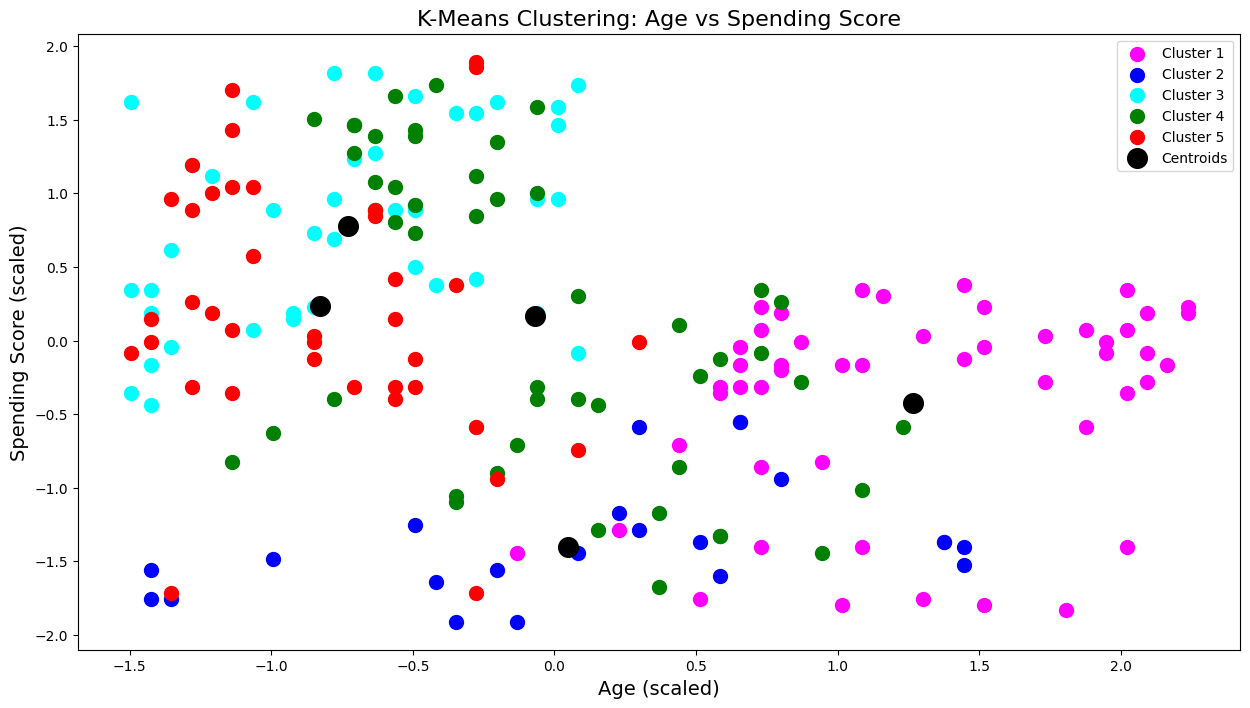

In [85]:
# Plotting the clusters based on Age and Spending Score
plt.figure(2, figsize=(15, 8))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 3], s=100, c='magenta', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 3], s=100, c='cyan', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 3], s=100, c='green', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 3], s=100, c='red', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=200, c='black', label='Centroids')

# Add titles and labels
plt.title('K-Means Clustering: Age vs Spending Score', fontsize=16)
plt.xlabel('Age (scaled)', fontsize=14)
plt.ylabel('Spending Score (scaled)', fontsize=14)
plt.legend()
plt.show()

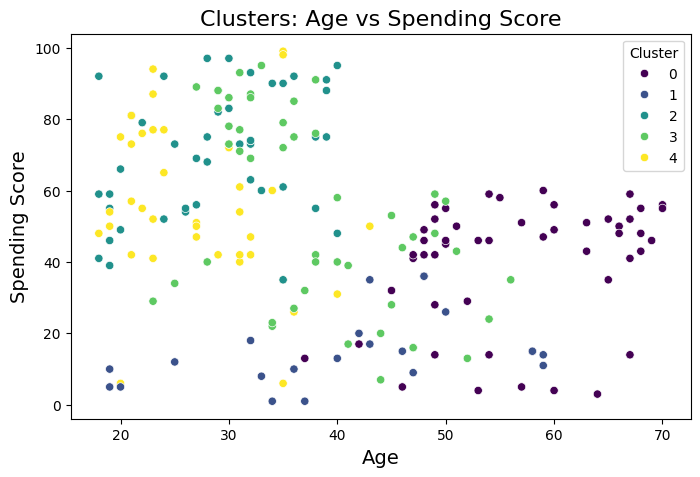

In [87]:
# Scatter plot for Age vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending_Score', hue='Cluster', data=customer, palette='viridis')
plt.title('Clusters: Age vs Spending Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.legend(title='Cluster')
plt.show()

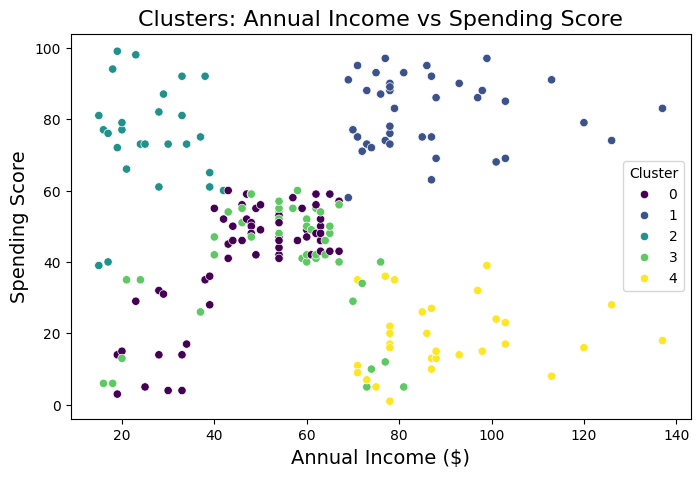

In [77]:
# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual_Income($)', y='Spending_Score', hue='Cluster', data=customer, palette='viridis')
plt.title('Clusters: Annual Income vs Spending Score', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.legend(title='Cluster')
plt.show()

In [78]:
cluster_analysis = customer.groupby('Cluster')[['Age', 'Annual_Income($)', 'Spending_Score']].mean()
print(cluster_analysis)


               Age  Annual_Income($)  Spending_Score
Cluster                                             
0        55.275862         47.620690       41.706897
1        32.875000         86.100000       81.525000
2        25.769231         26.115385       74.846154
3        26.733333         54.311111       40.911111
4        44.387097         89.774194       18.483871


**INSIGHTS & RECOMMENDATIONS**

Clusters 1 and 2: High-Spending Groups

Prioritize personalized marketing strategies, exclusive offers, and loyalty programs to maintain and further engage these high-value customers.
Cluster 4: Untapped Potential

This group consists of high-income customers with minimal spending. Focus on strategies to boost their engagement and spending, such as tailored recommendations or premium experiences.
Clusters 3 and 0: Moderate-to-Low Spenders

Encourage higher spending in these groups by offering discounts, special promotions, or bundled deals that add value.